|Name:|Tufan Kundu|
|-|-|
|Registration no:|24MDT0184|
|Course Name:|Deep Learning Lab|
|Course Code:|PMDS603P|
|Experiment:|3|
|Date:|31 July,2025|

## Question1. Today, we will try to recall the work done in the previous lab first.The second problem attempted in the last lab was to use MNIST dataset which contains handwritten numbers (their images) from 0 to 9 digits. First try to fit a simple neural network model. Let us import the necessary modules required for this along with the dataset. It contains 70000 handwritten images of digits from 0 to 9. So its a 10 class classification problem. Lets try to create a model that can do the classification task.

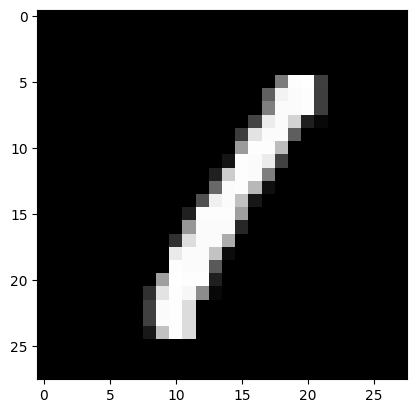

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.optimizers import SGD
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
batch_size = 128
num_classes = 10
epochs = 50
(x_train,y_train), (x_test,y_test) = mnist.load_data()
plt.imshow(x_train[3],cmap='gray')
plt.show()

In [3]:
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train/=255
x_test/=255
print(x_train.shape[0],'train samples')
print(x_test.shape[0],'test samples')
y_train = keras.utils.to_categorical(y_train,num_classes)
y_test_ = keras.utils.to_categorical(y_test,num_classes)

60000 train samples
10000 test samples


### Without dropout with relu activation

In [5]:
model = Sequential()
model.add(Dense(512, activation = 'relu',input_shape = (784,)))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))
model.summary()
sgd1 = SGD(learning_rate=0.01)
model.compile(loss = 'categorical_crossentropy', optimizer = sgd1, metrics = ['accuracy'])
history = model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test,y_test_))

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 669,706 (2.55 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6339 - loss: 1.5792 - val_accuracy: 0.8753 - val_loss: 0.5191
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8776 - loss: 0.4816 - val_accuracy: 0.8998 - val_loss: 0.3718
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9002 - loss: 0.3673 - val_accuracy: 0.9100 - val_loss: 0.3219
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9082 - loss: 0.3273 - val_accuracy: 0.9162 - val_loss: 0.2944
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9141 - loss: 0.2994 - val_accuracy: 0.9210 - val_loss: 0.2760
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9206 - loss: 0.2799 - val_accuracy: 0.9254 - val_loss: 0.2581
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9249 - loss: 0.2651 - val_accuracy: 0.9309 - val_loss: 0.2451
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9280 - loss: 0.2534 - val_accuracy: 0.

In [6]:
score = model.evaluate(x_test,y_test_, verbose = 1)
print("Test loss:", score[0])
print(f"Test Accuracy:{score[1]*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9674 - loss: 0.1071
Test loss: 0.09085401147603989
Test Accuracy:97.16%


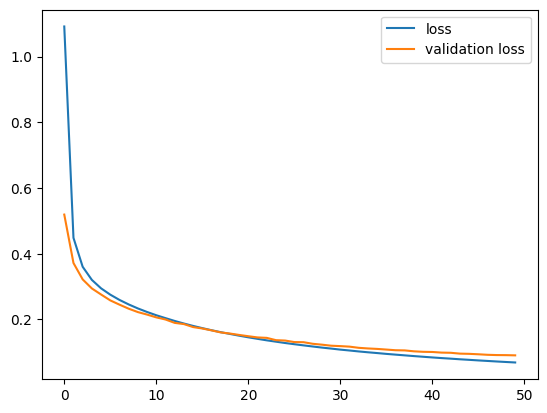

In [7]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.legend()
plt.show()

In [8]:
## Without dropout using sigmoid activation

In [9]:
model = Sequential()
model.add(Dense(512, activation = 'sigmoid',input_shape = (784,)))
model.add(Dense(512, activation = 'sigmoid'))
model.add(Dense(10, activation = 'softmax'))
model.summary()
sgd1 = SGD(learning_rate=0.01)
model.compile(loss = 'categorical_crossentropy', optimizer = sgd1, metrics = ['accuracy'])
history = model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test,y_test_))
score = model.evaluate(x_test,y_test_, verbose = 1)
print("Test loss:", score[0])
print(f"Test Accuracy:{score[1]*100:.2f}%")

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 669,706 (2.55 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1235 - loss: 2.3104 - val_accuracy: 0.1215 - val_loss: 2.2395
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3156 - loss: 2.2173 - val_accuracy: 0.4997 - val_loss: 2.1481
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5196 - loss: 2.1244 - val_accuracy: 0.5758 - val_loss: 2.0201
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6078 - loss: 1.9889 - val_accuracy: 0.6741 - val_loss: 1.8361
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6570 - loss: 1.7907 - val_accuracy: 0.6952 - val_loss: 1.5933
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6999 - loss: 1.5455 - val_accuracy: 0.7387 - val_loss: 1.3384
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7353 - loss: 1.3011 - val_accuracy: 0.7544 - val_loss: 1.1296
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7648 - loss: 1.1044 - val_accuracy: 0.

In [10]:
## Q2- Regularization Techniques

In [11]:
### Using dropout(0.2)

In [12]:
model = Sequential()
model.add(Dense(512, activation = 'relu',input_shape = (784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax'))
model.summary()
sgd1 = SGD(learning_rate=0.01)
model.compile(loss = 'categorical_crossentropy', optimizer = sgd1, metrics = ['accuracy'])
history = model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test,y_test_))
score = model.evaluate(x_test,y_test_, verbose = 1)
print("Test loss:", score[0])
print(f"Test Accuracy:{score[1]*100:.2f}%")

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 669,706 (2.55 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5040 - loss: 1.7127 - val_accuracy: 0.8659 - val_loss: 0.5540
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8342 - loss: 0.5980 - val_accuracy: 0.8958 - val_loss: 0.3815
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8699 - loss: 0.4484 - val_accuracy: 0.9073 - val_loss: 0.3270
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8869 - loss: 0.3898 - val_accuracy: 0.9153 - val_loss: 0.2958
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8963 - loss: 0.3494 - val_accuracy: 0.9214 - val_loss: 0.2744
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9065 - loss: 0.3235 - val_accuracy: 0.9277 - val_loss: 0.2576
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9102 - loss: 0.3048 - val_accuracy: 0.9296 - val_loss: 0.2436
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9146 - loss: 0.2919 - val_accuracy: 0.

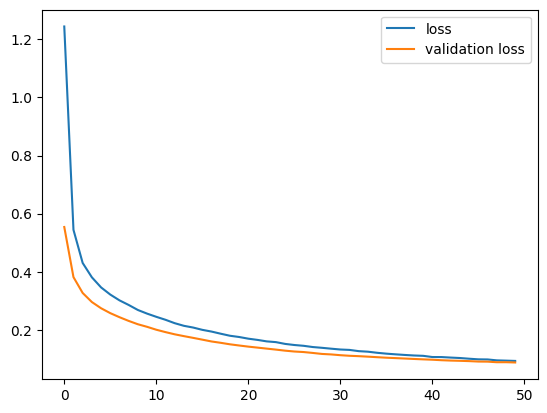

In [13]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.legend()
plt.show()

In [14]:
## Checking the image and output

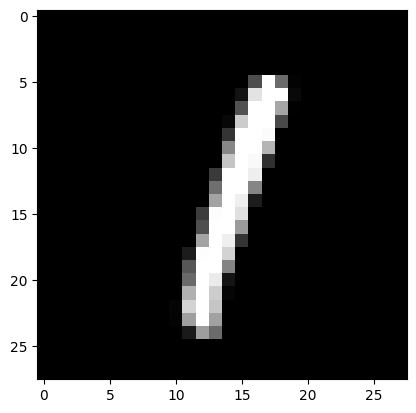

Label:[1]


In [15]:
plt.imshow(x_test[5].reshape(28, 28),cmap = 'gray')
plt.show()
print(f"Label:{model.predict(x_test[5].reshape(-1,784),verbose=0).argmax(axis = 1)}")

In [16]:
## Early stopping

In [17]:
from sklearn.model_selection import train_test_split
(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_subtrain,x_valid,y_subtrain,y_valid = train_test_split(x_train,y_train,test_size = 0.10, random_state = 1)
x_train = x_train/255
x_test = x_test/255
x_subtrain = x_subtrain/255
x_valid=x_valid/255

In [18]:
## making the ANN

In [19]:
model = Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))
model.summary()
sgd1 = SGD(learning_rate=0.01)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 669,706 (2.55 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
from keras.callbacks import EarlyStopping
model.compile(loss= 'sparse_categorical_crossentropy',optimizer = sgd1,metrics = ['accuracy'])
estop = EarlyStopping(monitor = 'val_loss', min_delta = 1e-3, mode = 'min', patience = 4, verbose = 1, restore_best_weights= True)
history = model.fit(x_subtrain,y_subtrain, batch_size=batch_size, epochs = 100, verbose = 1, validation_data=(x_valid,y_valid))

Epoch 1/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9930 - loss: 0.0313 - val_accuracy: 0.9748 - val_loss: 0.0872
Epoch 2/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9932 - loss: 0.0310 - val_accuracy: 0.9745 - val_loss: 0.0862
Epoch 3/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9944 - loss: 0.0276 - val_accuracy: 0.9755 - val_loss: 0.0872
Epoch 4/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9933 - loss: 0.0303 - val_accuracy: 0.9753 - val_loss: 0.0869
Epoch 5/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9937 - loss: 0.0301 - val_accuracy: 0.9747 - val_loss: 0.0854
Epoch 6/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9938 - loss: 0.0276 - val_accuracy: 0.9762 - val_loss: 0.0858
Epoch 7/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9946 - loss: 0.0271 - val_accuracy: 0.9752 - val_loss: 0.0859
Epoch 8/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9947 - loss: 0.0264 - val_a

In [26]:
score = model.evaluate(x_test,y_test, verbose = 1)
print("Test loss:", score[0])
print(f"Test Accuracy:{score[1]*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9766 - loss: 0.0797
Test loss: 0.06801275908946991
Test Accuracy:98.00%


## Challenging Question: Try for a scratch code for this case where you can create a custom neural network without using any inbuilt classes like sequential etc. Where you need to define a class neural network which has methods like forwardpass, backwardpass, and train. Figure out how we can do this. This model has inputs as [0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1] and the expected output as [0], [1], [1], [0] in each case. So there are three features in our dataset as you see above. The activation function is to be taken as sigmoid. The architecture is like we have only one hidden layer and an output layer with one neuron. Take the error function as (1/2)(y − yˆ)^2

In [21]:
import numpy as np

# sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# derivative of sigmoid function
def sigmoid_derivative(x):
    return x*(1-x)

# mean squared error loss
def mse_loss(y_true,y_pred):
    return 0.5*np.mean((y_true-y_pred)**2)

# Input dataset (XOR gate inputs with bias term)
x = np.array([[0,0,1],
[0,1,1],
[1,0,1],
[1,1,1]])

# output labels
y = np.array([[0],
[1],
[1],
[0]])

# seed for reproducibility
np.random.seed(1)

# Initialize weights randomly with mean 0
input_size = 3 # 3 input features
hidden_size = 2 # 2 hidden layers
output_size = 1 # 1 output neuron
# Weights
w1 = 2 * np.random.random((input_size, hidden_size))-1
w2 = 2 * np.random.random((hidden_size, output_size))-1
# Biases
b1 = np.zeros((1, hidden_size))
b2 = np.zeros((1, output_size))
# Learning rate
lr = 0.1
# Training loop

for epoch in range(10000):
    ##------------- Forward pass -------------------
    a1 = np.dot(x,w1) + b1
    h1 = sigmoid(a1) # activation of hidden layer
    a2 = np.dot(h1,w2) + b2
    output = sigmoid(a2) # final prediction
    # loss calculation
    loss = mse_loss(y,output)
    ##-------------- Back propagation ---------------
    # output layer error
    output_error = output - y
    output_delta = output_error * sigmoid_derivative(output)
    ## hidden layer error
    hidden_error = np.dot(output_delta, w2.T)
    hidden_delta = hidden_error * sigmoid_derivative(h1)
    ##------------Updating weights and biases -----------
    w2 -= lr * np.dot(h1.T,output_delta)
    b2 -= lr * np.sum(output_delta, axis = 0, keepdims = True)
    w1 -= lr * np.dot(x.T, hidden_delta)
    b1 -= lr * np.sum(hidden_delta, axis = 0, keepdims = True)
    # Print loss every 1000 epochs
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")
# --------- Final Output ---------
print("\nFinal predictions after training:")
print(output.round(3))

Epoch 0, Loss: 0.1267
Epoch 1000, Loss: 0.1215
Epoch 2000, Loss: 0.1029
Epoch 3000, Loss: 0.0905
Epoch 4000, Loss: 0.0828
Epoch 5000, Loss: 0.0433
Epoch 6000, Loss: 0.0105
Epoch 7000, Loss: 0.0049
Epoch 8000, Loss: 0.0031
Epoch 9000, Loss: 0.0022

Final predictions after training:
[[0.049]
 [0.945]
 [0.945]
 [0.071]]


In [22]:
y_pred_binary = (output > 0.5).astype(int)
print("Predicted labels:", y_pred_binary.ravel())
print("True labels: ", y.ravel())

Predicted labels: [0 1 1 0]
True labels:  [0 1 1 0]
